In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
# Load the dataset
df = pd.read_csv(r"/content/Solar Power Plant Data (1) - Copy.csv")

In [3]:
df

,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
0,01.01.2017-00:00,0.6,0,1003.8,-7.4,0.1,97,0.0
1,01.01.2017-01:00,1.7,0,1003.5,-7.4,-0.2,98,0.0
2,01.01.2017-02:00,0.6,0,1003.4,-6.7,-1.2,99,0.0
3,01.01.2017-03:00,2.4,0,1003.3,-7.2,-1.3,99,0.0
4,01.01.2017-04:00,4.0,0,1003.1,-6.3,3.6,67,0.0
...,...,...,...,...,...,...,...,...
8755,31.12.2017-19:00,4.1,0,988.2,-4.8,-0.7,94,0.0
8756,31.12.2017-20:00,2.1,0,987.3,-5.0,-0.3,95,0.0
8757,31.12.2017-21:00,1.8,0,986.7,-5.3,0.2,93,0.0
8758,31.12.2017-22:00,2.2,0,986.0,-5.4,0.3,92,0.0


In [4]:
df.head()

,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
0,01.01.2017-00:00,0.6,0,1003.8,-7.4,0.1,97,0.0
1,01.01.2017-01:00,1.7,0,1003.5,-7.4,-0.2,98,0.0
2,01.01.2017-02:00,0.6,0,1003.4,-6.7,-1.2,99,0.0
3,01.01.2017-03:00,2.4,0,1003.3,-7.2,-1.3,99,0.0
4,01.01.2017-04:00,4.0,0,1003.1,-6.3,3.6,67,0.0


In [5]:
df.tail()

,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
8755,31.12.2017-19:00,4.1,0,988.2,-4.8,-0.7,94,0.0
8756,31.12.2017-20:00,2.1,0,987.3,-5.0,-0.3,95,0.0
8757,31.12.2017-21:00,1.8,0,986.7,-5.3,0.2,93,0.0
8758,31.12.2017-22:00,2.2,0,986.0,-5.4,0.3,92,0.0
8759,31.12.2017-23:00,2.4,0,985.6,-5.9,0.4,96,0.0


In [6]:
df.shape

(8760, 8)

In [7]:
df.columns

Index(['Date-Hour(NMT)', 'WindSpeed', 'Sunshine', 'AirPressure', 'Radiation',
       'AirTemperature', 'RelativeAirHumidity', 'SystemProduction'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date-Hour(NMT)       8760 non-null   object 
 1   WindSpeed            8760 non-null   float64
 2   Sunshine             8760 non-null   int64  
 3   AirPressure          8760 non-null   float64
 4   Radiation            8760 non-null   float64
 5   AirTemperature       8760 non-null   float64
 6   RelativeAirHumidity  8760 non-null   int64  
 7   SystemProduction     8760 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 547.6+ KB


In [10]:
df.isnull().sum()

,0
Date-Hour(NMT),0
WindSpeed,0
Sunshine,0
AirPressure,0
Radiation,0
AirTemperature,0
RelativeAirHumidity,0
SystemProduction,0


In [11]:
df.describe()

,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2.639823,11.180479,1010.361781,97.538493,6.978893,76.719406,684.746071
std,1.628754,21.171295,12.793971,182.336029,7.604266,19.278996,1487.454665
min,0.000000,0.000000,965.900000,-9.300000,-12.400000,13.000000,0.000000
25%,1.400000,0.000000,1002.800000,-6.200000,0.500000,64.000000,0.000000
50%,2.300000,0.000000,1011.000000,-1.400000,6.400000,82.000000,0.000000
75%,3.600000,7.000000,1018.200000,115.600000,13.400000,93.000000,464.249950
max,10.900000,60.000000,1047.300000,899.700000,27.100000,100.000000,7701.000000


In [16]:
df['Date-Hour(NMT)'] = pd.to_datetime(
    df['Date-Hour(NMT)'],
    format="%d.%m.%Y-%H:%M"
)

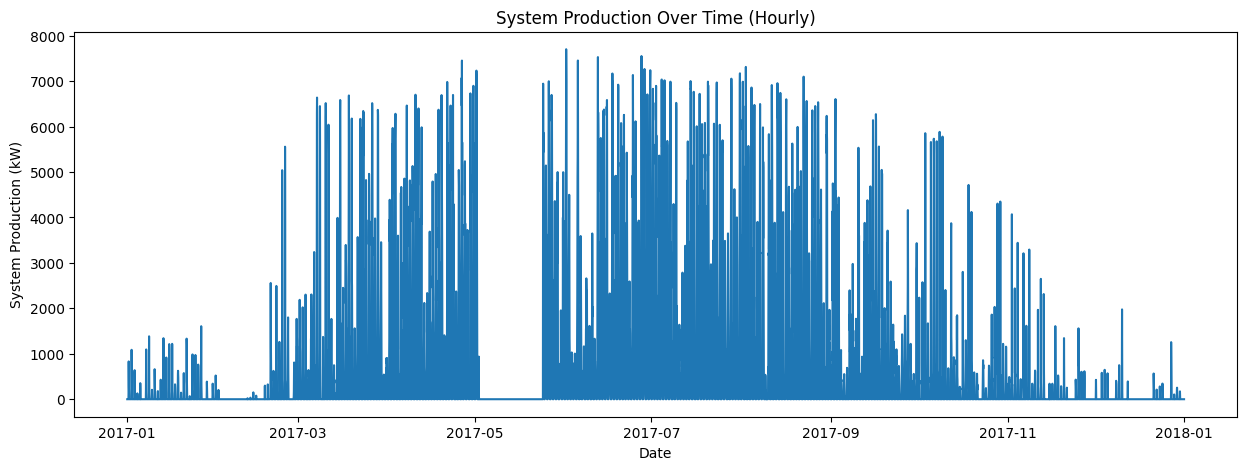

In [18]:

df['Date-Hour(NMT)'] = pd.to_datetime(df['Date-Hour(NMT)'])

plt.figure(figsize=(15,5))
plt.plot(df['Date-Hour(NMT)'], df['SystemProduction'], linewidth=0.7)
plt.title("System Production Over Time (Hourly)")
plt.xlabel("Date")
plt.ylabel("System Production (kW)")
plt.grid(True, alpha=0.3)
plt.show()

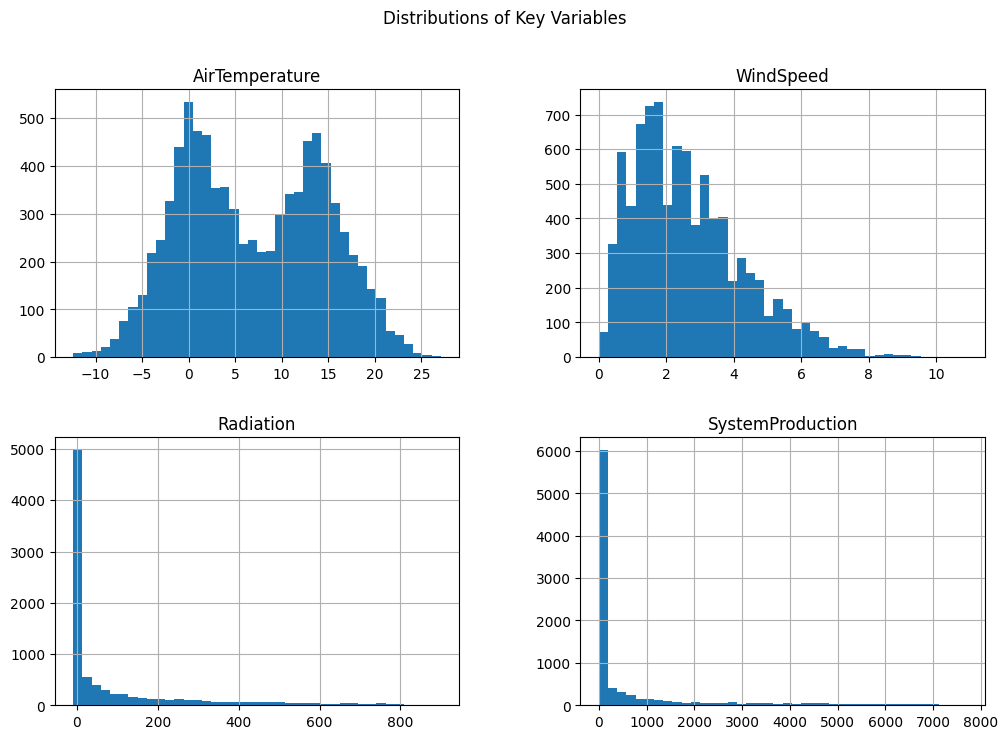

In [22]:
df[['AirTemperature','WindSpeed','Radiation','SystemProduction']].hist(bins=40, figsize=(12,8))
plt.suptitle("Distributions of Key Variables")
plt.show()

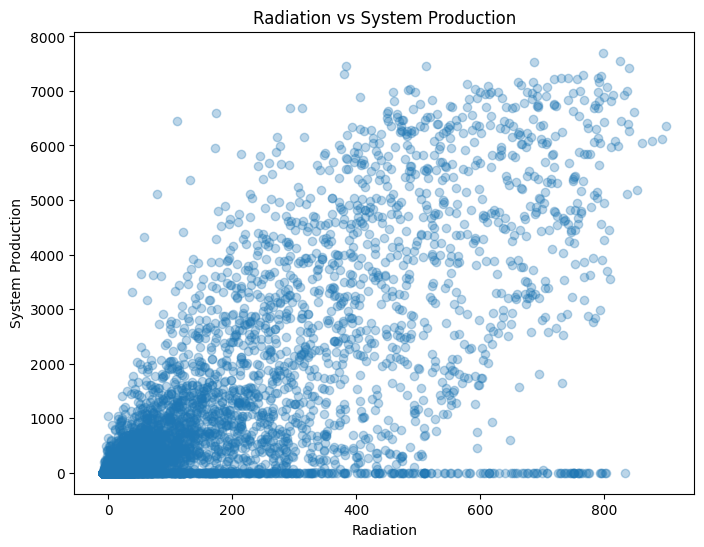

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(df['Radiation'], df['SystemProduction'], alpha=0.3)
plt.title("Radiation vs System Production")
plt.xlabel("Radiation")
plt.ylabel("System Production")
plt.show()

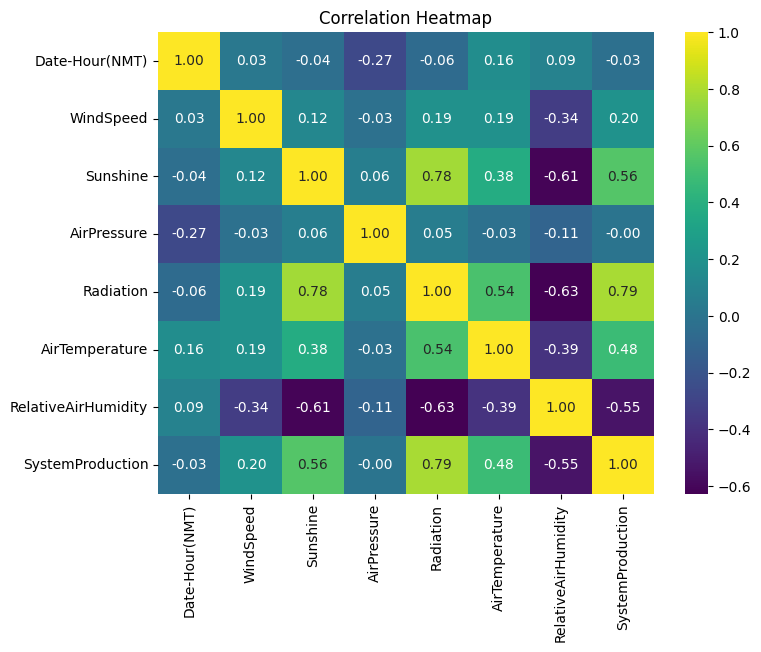

In [21]:

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [23]:
# Features (input) and target (output)
X = df[['WindSpeed', 'Sunshine', 'AirPressure', 'Radiation', 'AirTemperature', 'RelativeAirHumidity']].values
y = df['SystemProduction'].values


In [24]:
# Scale the features and target variable to range [0, 1]
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))


In [25]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [26]:
# Reshape data for LSTM and GRU
time_step = 30  # Number of previous time steps to predict the next
def create_dataset(X, y, time_step=1):
    Xs, ys = [], []
    for i in range(len(X) - time_step - 1):
        Xs.append(X[i:(i + time_step), :])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

X_scaled, y_scaled = create_dataset(X_scaled, y_scaled, time_step)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


In [27]:
# Build the LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(units=30, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(LSTM(units=30))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

early_stop = EarlyStopping(monitor='val_loss', patience=2)  # Early stopping to avoid overfitting
lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 0.0262 - val_loss: 0.0134
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0134 - val_loss: 0.0113
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - loss: 0.0111 - val_loss: 0.0109
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 0.0099 - val_loss: 0.0101
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0097 - val_loss: 0.0099


In [28]:
# Build the GRU Model
gru_model = Sequential()
gru_model.add(GRU(units=30, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
gru_model.add(GRU(units=30))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mean_squared_error')

gru_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: 0.0254 - val_loss: 0.0133
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - loss: 0.0108 - val_loss: 0.0107
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 0.0106 - val_loss: 0.0108
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - loss: 0.0099 - val_loss: 0.0119


In [29]:
# Build the Random Forest Model
X_train_rf = X_train.reshape(X_train.shape[0], -1)  # Flatten the time series data
X_test_rf = X_test.reshape(X_test.shape[0], -1)

rf_model = RandomForestRegressor(n_estimators=30, max_depth=7, random_state=42)
rf_model.fit(X_train_rf, y_train.ravel())
rf_predictions = rf_model.predict(X_test_rf)

In [30]:
# Make predictions with LSTM and GRU
lstm_predictions = lstm_model.predict(X_test)
gru_predictions = gru_model.predict(X_test)

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [31]:
# Inverse scale predictions and target for evaluation
lstm_predictions_inv = scaler_y.inverse_transform(lstm_predictions)
gru_predictions_inv = scaler_y.inverse_transform(gru_predictions)
rf_predictions_inv = scaler_y.inverse_transform(rf_predictions.reshape(-1, 1))
y_test_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1))


In [32]:
# Normalize errors by dividing by the range of target values
target_range = scaler_y.data_max_ - scaler_y.data_min_
lstm_mae = mean_absolute_error(y_test_inv, lstm_predictions_inv) / target_range
gru_mae = mean_absolute_error(y_test_inv, gru_predictions_inv) / target_range
rf_mae = mean_absolute_error(y_test_inv, rf_predictions_inv) / target_range

# Print normalized Mean Absolute Errors
print(f'LSTM MAE (normalized): {lstm_mae}')
print(f'GRU MAE (normalized): {gru_mae}')
print(f'Random Forest MAE (normalized): {rf_mae}')


LSTM MAE (normalized): [0.05537725]
GRU MAE (normalized): [0.07225937]
Random Forest MAE (normalized): [0.03517926]


In [35]:
# --- MSE (normalized by square of range) ---
lstm_mse = mean_squared_error(y_test_inv, lstm_predictions_inv) / (target_range ** 2)
gru_mse = mean_squared_error(y_test_inv, gru_predictions_inv) / (target_range ** 2)
rf_mse = mean_squared_error(y_test_inv, rf_predictions_inv) / (target_range ** 2)

# --- R² (no normalization needed) ---
lstm_r2 = r2_score(y_test_inv, lstm_predictions_inv)
gru_r2 = r2_score(y_test_inv, gru_predictions_inv)
rf_r2 = r2_score(y_test_inv, rf_predictions_inv)

# Print all metrics
print("=== Normalized Errors and R² ===")
print(f"LSTM - MAE: {lstm_mae[0]:.4f}, MSE: {lstm_mse[0]:.4f}, R²: {lstm_r2:.4f}")
print(f"GRU  - MAE: {gru_mae[0]:.4f}, MSE: {gru_mse[0]:.4f}, R²: {gru_r2:.4f}")
print(f"RF   - MAE: {rf_mae[0]:.4f}, MSE: {rf_mse[0]:.4f}, R²: {rf_r2:.4f}")

=== Normalized Errors and R² ===
LSTM - MAE: 0.0554, MSE: 0.0099, R²: 0.7448
GRU  - MAE: 0.0723, MSE: 0.0119, R²: 0.6936
RF   - MAE: 0.0352, MSE: 0.0073, R²: 0.8123


In [36]:
# Ensure data is 1D and compatible for line plotting
y_test_inv = y_test_inv.flatten()
lstm_predictions_inv = lstm_predictions_inv.flatten()
gru_predictions_inv = gru_predictions_inv.flatten()
rf_predictions_inv = rf_predictions_inv.flatten()

# Clip values to ensure all are positive
y_test_inv = np.clip(y_test_inv, 0, None)
lstm_predictions_inv = np.clip(lstm_predictions_inv, 0, None)
gru_predictions_inv = np.clip(gru_predictions_inv, 0, None)
rf_predictions_inv = np.clip(rf_predictions_inv, 0, None)


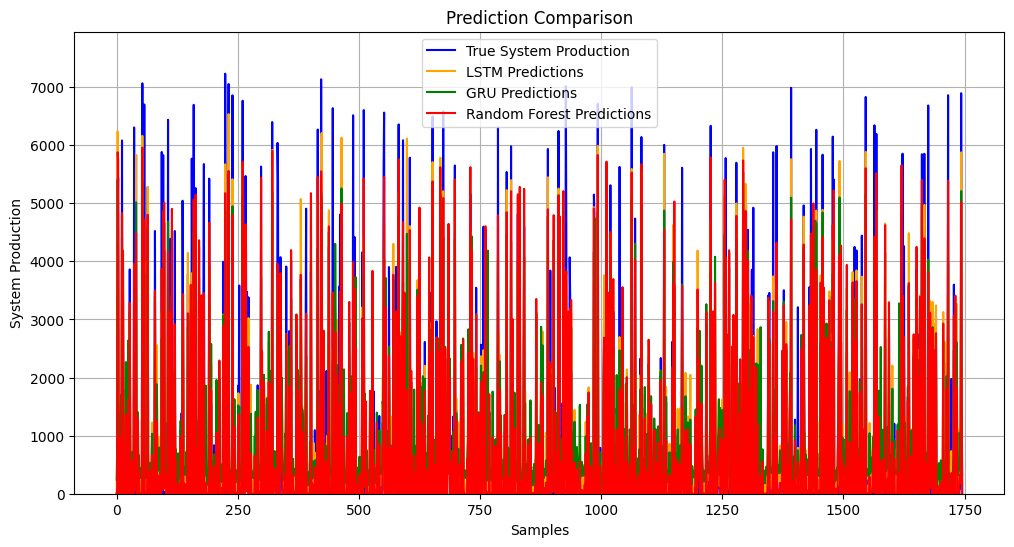

In [37]:
# Plot predictions vs. actual values as a 2D line graph
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='True System Production', color='blue', linestyle='-', linewidth=1.5)
plt.plot(lstm_predictions_inv, label='LSTM Predictions', color='orange', linestyle='-', linewidth=1.5)
plt.plot(gru_predictions_inv, label='GRU Predictions', color='green', linestyle='-', linewidth=1.5)
plt.plot(rf_predictions_inv, label='Random Forest Predictions', color='red', linestyle='-', linewidth=1.5)

# Add legend, title, and labels
plt.legend()
plt.title('Prediction Comparison')
plt.xlabel('Samples')
plt.ylabel('System Production')
plt.ylim(0, max(np.max(y_test_inv), np.max(lstm_predictions_inv), np.max(gru_predictions_inv), np.max(rf_predictions_inv)) * 1.1)  # Ensures y-axis starts from 0 and fits all data
plt.grid(True)
plt.show()